Preprocessing data:

In [273]:
record1 = "databases/record1.csv"
record2 = "databases/record2.csv"

**DIRECTORY OF DICTIONARY**

*After the following code, list_directory (which gives the directory of what each index in the list in the values of the dictionary) contains:*
['ID NUMBER', 'OFFENSE ARREST DESC', 'OFFENSE ATTEMPT DESC', 'COUNTY COMMITTED', 'DATE OF BIRTH', 'RACE DESC', 'GENDER', 'FACILITY', 'CURRENT SENTENCE PARDONED OR COMMUTED DATE', 'SENTENCE BEGIN DATE', 'MIN TERM/YEAR', 'MIN MONTH', 'MIN DAY', 'MAX TERM/YEAR', 'MAX MONTH', 'MAX DAY', 'PAROLE ELIGIBILITY DATE', 'EARLIEST POSSIBLE RELEASE DATE', 'INST RELEASE DATE', 'INST RELEASE TYPE', 'PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR)', 'PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR)', 'PAROLE BOARD STATUS', 'PAROLE DATE', 'PAROLE DISCHARGE DESC', 'SENTENCE LENGTH']

*Removed from record 2:*
OFFENSE MINIMUM YEAR OR TERM;
MINIMUM MONTH;
MINIMUM DAY;
OFFENSE MAXIMUM YEAR OR TERM;
MAXIMUM MONTH;
MAXIMUM DAY;
FELONY MSDMNR CODE;
OFFENSE TYPE CODE;
HABITUAL CRIME;
OFFENSE RUN CODE;

*Removed from record 1:*
COMMITTED LAST NAME;
FIRST NAME;
MIDDLE NAME;
NAME EXTENSION;
LEGAL LAST NAME;
FIRST NAME;
MIDDLE NAME;
NAME EXTENSION;
GUN CLAUSE;
GOOD TIME LAW;

**INDEX**

*From record 2*

'ID NUMBER' = 0

'OFFENSE ARREST DESC' = 1

'OFFENSE ATTEMPT DESC' = 2

'COUNTY COMMITTED' = 3


*From record 1*

'DATE OF BIRTH' = 4 **changed to year**

'RACE DESC' = 5

'GENDER' = 6

'FACILITY' = 7

'CURRENT SENTENCE PARDONED OR COMMUTED DATE' = 8 **changed to year**

'SENTENCE BEGIN DATE' = 9 **changed to year**

'MIN TERM/YEAR' = 10

'MIN MONTH' = 11

'MIN DAY' = 12

'MAX TERM/YEAR' = 13

'MAX MONTH' = 14

'MAX DAY' = 15

'PAROLE ELIGIBILITY DATE' = 16 **changed to year**

'EARLIEST POSSIBLE RELEASE DATE' = 17 **changed to year**

'INST RELEASE DATE' = 18 **changed to year**

'INST RELEASE TYPE' = 19

'PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR)' = 20

'PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR)' = 21

'PAROLE BOARD STATUS' = 22

'PAROLE DATE' = 23 **changed to year**

'PAROLE DISCHARGE DESC' = 24

*Our additions:*

'SENTENCE LENGTH' = 25

*sentence length dictionary*: key is crime string, value is 2 lists: list 0 is white, list 1 is non-white


**Record 2:**

In [274]:
master_dict = {}
list_directory = []
file_record2 = open(record2, "r")
counter = 0
for line in file_record2:
    # split by comma
    line = line.split(",")
    if len(line) == 14:
        if counter == 0:
            # strip \ufeff and \n
            line[0] = line[0][1:]
            line[-1] = line[-1][0:-1]
            # removes indexes we don't need
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(2)
            line.pop(2)
            line.pop(3)
            line.pop(3)
            list_directory = line
        else:
            line[-1] = line[-1][0:-1]
            # removes indexes we don't need
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(2)
            line.pop(2)
            line.pop(3)
            line.pop(3)
            # strips leading and ending whitespace:
            for item in range(len(line)):
                line[item] = line[item].strip()
            # add to master dict if not in already
            if line[0] not in master_dict:
                master_dict[line[0]] = line
            # if it is in already, remove the id from dict as it is a multiple offender or duplicate
            else:
                del master_dict[line[0]]
    counter += 1

In [275]:
# how many left over after removing of duplicated
print(len(master_dict.keys()))

48223


**Record 1:**

In [276]:
file_record1 = open(record1, "r")
counter = 0
for line in file_record1:
    save_beginmonth = "" # in case sentence begin year = sentence end year, we need the months
    save_endmonth = ""
    line = line.split(",")
    if len(line) == 32:
        if counter == 0:
            # remove all unneeded, then remove \n
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(5)
            line.pop(14)
            line[-1] = line[-1][0:-1]
            list_directory = list_directory + line
            list_directory.append("SENTENCE LENGTH")
        else:
            #print(counter)
            line[-1] = line[-1][0:-1]

            for item in range(len(line)):
                line[item] = line[item].strip()

            # we only want the ones in the dictionary (first offenders)
            if line[0] in master_dict:
                # remove unneeded indexes, save id
                id_ = line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(5)
                line.pop(14)

                # see if person has earliest possible release date (13) and sentence begin date (5)
                if line[13] == '' or line[5] == '' or line[13] == ' ' or line[5] == ' ':
                    # remove from dictionary if they don't
                    del master_dict[id_]

                else:
                    # change DOB to year
                    if line[0] != '':
                        line[0] = line[0][-4:]
                    # change sentence pardoned to year
                    if line[4] != '':
                        line[4] = line[4][-4:]
                    # change sentence begin date to year
                    if line[5] != '':
                        for i in range(len(line[5])):
                            if line[5][i] != "/":
                                save_beginmonth += line[5][i]
                            else:
                                break
                        line[5] = line[5][-4:]
                    # change parol eligibility date to year
                    if line[12] != '':
                        line[12] = line[12][-4:]
                    # change earliest possible release date to year
                    if line[13] != '':
                        for i in range(len(line[13])):
                            if line[13][i] != "/":
                                save_endmonth += line[13][i]
                            else:
                                break
                        line[13] = line[13][-4:]
                        #print(line[13])
                    # change inst release date to year
                    if line[14] != '':
                        line[14] = line[14][-4:]
                    # changed parole date to year
                    if line[19] != '' and line[19][0:7] != "PAROLED":
                        line[19] = line[19][-4:]

                    # add sentence length
                    if line[13] == 'LFE' or line[13] == 'DTH':
                        line.append(line[13])
                    elif line[5] == 'EARM':
                        line.append(line[5])
                    else:
                        sent_length = int(line[13]) - int(line[5])
                        if sent_length == 0:
                            print(line[13])
                            print(line[5])
                            sent_length = (int(save_endmonth) - int(save_beginmonth)) / 12
                            print("end: " + save_endmonth)
                            print("begin " + save_beginmonth)
                            print(sent_length)
                            print("\n")
                        line.append(str(sent_length))

                    master_dict[id_] = master_dict[id_] + line

    else:
        if line[0] in master_dict:
            del master_dict[line[0]]         
    counter += 1

1977
1977
end: 9
begin 1
0.6666666666666666


1977
1977
end: 9
begin 1
0.6666666666666666


1977
1977
end: 10
begin 2
0.6666666666666666


1977
1977
end: 7
begin 2
0.4166666666666667


1977
1977
end: 11
begin 2
0.75


1977
1977
end: 11
begin 3
0.6666666666666666


1977
1977
end: 12
begin 4
0.6666666666666666


1977
1977
end: 12
begin 4
0.6666666666666666


1977
1977
end: 12
begin 4
0.6666666666666666


1977
1977
end: 12
begin 4
0.6666666666666666


1977
1977
end: 10
begin 5
0.4166666666666667


1977
1977
end: 9
begin 7
0.16666666666666666


1977
1977
end: 11
begin 11
0.0


1978
1978
end: 9
begin 1
0.6666666666666666


1978
1978
end: 10
begin 1
0.75


1978
1978
end: 9
begin 1
0.6666666666666666


1978
1978
end: 8
begin 1
0.5833333333333334


1978
1978
end: 9
begin 1
0.6666666666666666


1978
1978
end: 7
begin 1
0.5


1978
1978
end: 8
begin 1
0.5833333333333334


1978
1978
end: 9
begin 1
0.6666666666666666


1978
1978
end: 9
begin 1
0.6666666666666666


1978
1978
end: 9
begin 1
0.6666666

1982
1982
end: 11
begin 4
0.5833333333333334


1982
1982
end: 12
begin 4
0.6666666666666666


1982
1982
end: 12
begin 4
0.6666666666666666


1982
1982
end: 10
begin 4
0.5


1982
1982
end: 12
begin 4
0.6666666666666666


1982
1982
end: 9
begin 4
0.4166666666666667


1982
1982
end: 12
begin 4
0.6666666666666666


1982
1982
end: 12
begin 4
0.6666666666666666


1982
1982
end: 10
begin 4
0.5


1982
1982
end: 11
begin 4
0.5833333333333334


1982
1982
end: 11
begin 4
0.5833333333333334


1982
1982
end: 12
begin 5
0.5833333333333334


1982
1982
end: 8
begin 5
0.25


1982
1982
end: 8
begin 5
0.25


1982
1982
end: 11
begin 5
0.5


1982
1982
end: 7
begin 5
0.16666666666666666


1982
1982
end: 9
begin 5
0.3333333333333333


1982
1982
end: 12
begin 6
0.5


1982
1982
end: 11
begin 6
0.4166666666666667


1982
1982
end: 12
begin 7
0.4166666666666667


1982
1982
end: 12
begin 7
0.4166666666666667


1982
1982
end: 3
begin 7
-0.3333333333333333


1982
1982
end: 11
begin 10
0.08333333333333333


1982
1982

1988
end: 7
begin 1
0.5


1988
1988
end: 9
begin 1
0.6666666666666666


1988
1988
end: 9
begin 1
0.6666666666666666


1988
1988
end: 10
begin 2
0.6666666666666666


1988
1988
end: 11
begin 2
0.75


1988
1988
end: 10
begin 2
0.6666666666666666


1988
1988
end: 10
begin 2
0.6666666666666666


1988
1988
end: 10
begin 2
0.6666666666666666


1988
1988
end: 10
begin 2
0.6666666666666666


1988
1988
end: 11
begin 2
0.75


1988
1988
end: 10
begin 2
0.6666666666666666


1988
1988
end: 5
begin 2
0.25


1988
1988
end: 8
begin 2
0.5


1988
1988
end: 10
begin 2
0.6666666666666666


1988
1988
end: 7
begin 2
0.4166666666666667


1988
1988
end: 8
begin 2
0.5


1988
1988
end: 6
begin 2
0.3333333333333333


1988
1988
end: 12
begin 2
0.8333333333333334


1988
1988
end: 5
begin 3
0.16666666666666666


1988
1988
end: 12
begin 3
0.75


1988
1988
end: 10
begin 3
0.5833333333333334


1988
1988
end: 8
begin 3
0.4166666666666667


1988
1988
end: 9
begin 3
0.5


1988
1988
end: 8
begin 3
0.4166666666666667


1988

begin 1
0.75


1992
1992
end: 11
begin 1
0.8333333333333334


1992
1992
end: 8
begin 1
0.5833333333333334


1992
1992
end: 9
begin 1
0.6666666666666666


1992
1992
end: 9
begin 1
0.6666666666666666


1992
1992
end: 9
begin 1
0.6666666666666666


1992
1992
end: 9
begin 1
0.6666666666666666


1992
1992
end: 9
begin 1
0.6666666666666666


1992
1992
end: 11
begin 1
0.8333333333333334


1992
1992
end: 8
begin 1
0.5833333333333334


1992
1992
end: 8
begin 1
0.5833333333333334


1992
1992
end: 9
begin 2
0.5833333333333334


1992
1992
end: 10
begin 2
0.6666666666666666


1992
1992
end: 10
begin 2
0.6666666666666666


1992
1992
end: 10
begin 2
0.6666666666666666


1992
1992
end: 12
begin 2
0.8333333333333334


1992
1992
end: 7
begin 2
0.4166666666666667


1992
1992
end: 7
begin 2
0.4166666666666667


1992
1992
end: 7
begin 2
0.4166666666666667


1992
1992
end: 11
begin 2
0.75


1992
1992
end: 10
begin 2
0.6666666666666666


1992
1992
end: 4
begin 2
0.16666666666666666


1992
1992
end: 10
begin 

1993
1993
end: 11
begin 5
0.5


1993
1993
end: 10
begin 5
0.4166666666666667


1993
1993
end: 11
begin 5
0.5


1993
1993
end: 11
begin 5
0.5


1993
1993
end: 10
begin 6
0.3333333333333333


1993
1993
end: 10
begin 6
0.3333333333333333


1993
1993
end: 7
begin 6
0.08333333333333333


1993
1993
end: 12
begin 6
0.5


1993
1993
end: 11
begin 6
0.4166666666666667


1993
1993
end: 9
begin 6
0.25


1993
1993
end: 11
begin 6
0.4166666666666667


1993
1993
end: 12
begin 6
0.5


1993
1993
end: 10
begin 6
0.3333333333333333


1993
1993
end: 9
begin 6
0.25


1993
1993
end: 8
begin 6
0.16666666666666666


1993
1993
end: 12
begin 6
0.5


1993
1993
end: 12
begin 6
0.5


1993
1993
end: 12
begin 6
0.5


1993
1993
end: 10
begin 6
0.3333333333333333


1993
1993
end: 8
begin 6
0.16666666666666666


1993
1993
end: 9
begin 6
0.25


1993
1993
end: 12
begin 6
0.5


1993
1993
end: 7
begin 7
0.0


1993
1993
end: 9
begin 7
0.16666666666666666


1993
1993
end: 10
begin 7
0.25


1993
1993
end: 10
begin 7
0.25


19

1997
1997
end: 11
begin 1
0.8333333333333334


1997
1997
end: 6
begin 1
0.4166666666666667


1997
1997
end: 7
begin 1
0.5


1997
1997
end: 5
begin 1
0.3333333333333333


1997
1997
end: 5
begin 1
0.3333333333333333


1997
1997
end: 3
begin 1
0.16666666666666666


1997
1997
end: 9
begin 1
0.6666666666666666


1997
1997
end: 7
begin 1
0.5


1997
1997
end: 7
begin 1
0.5


1997
1997
end: 3
begin 1
0.16666666666666666


1997
1997
end: 2
begin 1
0.08333333333333333


1997
1997
end: 7
begin 1
0.5


1997
1997
end: 3
begin 1
0.16666666666666666


1997
1997
end: 7
begin 1
0.5


1997
1997
end: 9
begin 2
0.5833333333333334


1997
1997
end: 10
begin 2
0.6666666666666666


1997
1997
end: 3
begin 2
0.08333333333333333


1997
1997
end: 10
begin 2
0.6666666666666666


1997
1997
end: 9
begin 2
0.5833333333333334


1997
1997
end: 10
begin 2
0.6666666666666666


1997
1997
end: 4
begin 2
0.16666666666666666


1997
1997
end: 9
begin 2
0.5833333333333334


1997
1997
end: 7
begin 2
0.4166666666666667


1997
19


1999
1999
end: 10
begin 5
0.4166666666666667


1999
1999
end: 9
begin 5
0.3333333333333333


1999
1999
end: 11
begin 5
0.5


1999
1999
end: 10
begin 5
0.4166666666666667


1999
1999
end: 12
begin 6
0.5


1999
1999
end: 11
begin 6
0.4166666666666667


1999
1999
end: 12
begin 6
0.5


1999
1999
end: 10
begin 6
0.3333333333333333


1999
1999
end: 11
begin 6
0.4166666666666667


1999
1999
end: 7
begin 6
0.08333333333333333


1999
1999
end: 9
begin 6
0.25


1999
1999
end: 12
begin 6
0.5


1999
1999
end: 5
begin 6
-0.08333333333333333


1999
1999
end: 2
begin 6
-0.3333333333333333


1999
1999
end: 11
begin 6
0.4166666666666667


1999
1999
end: 11
begin 6
0.4166666666666667


1999
1999
end: 12
begin 6
0.5


1999
1999
end: 11
begin 6
0.4166666666666667


1999
1999
end: 12
begin 6
0.5


1999
1999
end: 12
begin 6
0.5


1999
1999
end: 11
begin 7
0.3333333333333333


1999
1999
end: 10
begin 7
0.25


1999
1999
end: 7
begin 7
0.0


1999
1999
end: 10
begin 7
0.25


1999
1999
end: 10
begin 7
0.25


19

2001
2001
end: 10
begin 3
0.5833333333333334


2001
2001
end: 6
begin 3
0.25


2001
2001
end: 8
begin 3
0.4166666666666667


2001
2001
end: 11
begin 3
0.6666666666666666


2001
2001
end: 7
begin 3
0.3333333333333333


2001
2001
end: 8
begin 3
0.4166666666666667


2001
2001
end: 3
begin 3
0.0


2001
2001
end: 5
begin 3
0.16666666666666666


2001
2001
end: 9
begin 3
0.5


2001
2001
end: 12
begin 3
0.75


2001
2001
end: 10
begin 3
0.5833333333333334


2001
2001
end: 12
begin 3
0.75


2001
2001
end: 8
begin 3
0.4166666666666667


2001
2001
end: 11
begin 3
0.6666666666666666


2001
2001
end: 12
begin 3
0.75


2001
2001
end: 11
begin 3
0.6666666666666666


2001
2001
end: 10
begin 3
0.5833333333333334


2001
2001
end: 9
begin 3
0.5


2001
2001
end: 12
begin 3
0.75


2001
2001
end: 4
begin 3
0.08333333333333333


2001
2001
end: 9
begin 3
0.5


2001
2001
end: 4
begin 3
0.08333333333333333


2001
2001
end: 11
begin 3
0.6666666666666666


2001
2001
end: 9
begin 4
0.4166666666666667


2001
2001
en

2003
2003
end: 8
begin 1
0.5833333333333334


2003
2003
end: 6
begin 1
0.4166666666666667


2003
2003
end: 7
begin 1
0.5


2003
2003
end: 9
begin 1
0.6666666666666666


2003
2003
end: 2
begin 1
0.08333333333333333


2003
2003
end: 6
begin 1
0.4166666666666667


2003
2003
end: 4
begin 1
0.25


2003
2003
end: 10
begin 1
0.75


2003
2003
end: 8
begin 1
0.5833333333333334


2003
2003
end: 12
begin 1
0.9166666666666666


2003
2003
end: 10
begin 1
0.75


2003
2003
end: 8
begin 2
0.5


2003
2003
end: 11
begin 2
0.75


2003
2003
end: 2
begin 2
0.0


2003
2003
end: 3
begin 2
0.08333333333333333


2003
2003
end: 11
begin 2
0.75


2003
2003
end: 12
begin 2
0.8333333333333334


2003
2003
end: 8
begin 2
0.5


2003
2003
end: 4
begin 2
0.16666666666666666


2003
2003
end: 9
begin 2
0.5833333333333334


2003
2003
end: 11
begin 2
0.75


2003
2003
end: 8
begin 2
0.5


2003
2003
end: 11
begin 2
0.75


2003
2003
end: 8
begin 2
0.5


2003
2003
end: 6
begin 2
0.3333333333333333


2003
2003
end: 9
begin 2
0.


2004
2004
end: 4
begin 3
0.08333333333333333


2004
2004
end: 3
begin 3
0.0


2004
2004
end: 6
begin 3
0.25


2004
2004
end: 8
begin 3
0.4166666666666667


2004
2004
end: 11
begin 3
0.6666666666666666


2004
2004
end: 7
begin 3
0.3333333333333333


2004
2004
end: 7
begin 3
0.3333333333333333


2004
2004
end: 9
begin 3
0.5


2004
2004
end: 12
begin 3
0.75


2004
2004
end: 12
begin 3
0.75


2004
2004
end: 9
begin 3
0.5


2004
2004
end: 9
begin 3
0.5


2004
2004
end: 9
begin 3
0.5


2004
2004
end: 11
begin 4
0.5833333333333334


2004
2004
end: 9
begin 4
0.4166666666666667


2004
2004
end: 9
begin 4
0.4166666666666667


2004
2004
end: 10
begin 4
0.5


2004
2004
end: 8
begin 4
0.3333333333333333


2004
2004
end: 12
begin 4
0.6666666666666666


2004
2004
end: 12
begin 4
0.6666666666666666


2004
2004
end: 4
begin 4
0.0


2004
2004
end: 4
begin 4
0.0


2004
2004
end: 6
begin 4
0.16666666666666666


2004
2004
end: 6
begin 4
0.16666666666666666


2004
2004
end: 7
begin 4
0.25


2004
2004
end: 



2005
2005
end: 7
begin 3
0.3333333333333333


2005
2005
end: 6
begin 3
0.25


2005
2005
end: 9
begin 3
0.5


2005
2005
end: 9
begin 3
0.5


2005
2005
end: 9
begin 3
0.5


2005
2005
end: 10
begin 3
0.5833333333333334


2005
2005
end: 9
begin 3
0.5


2005
2005
end: 8
begin 3
0.4166666666666667


2005
2005
end: 12
begin 3
0.75


2005
2005
end: 4
begin 4
0.0


2005
2005
end: 6
begin 4
0.16666666666666666


2005
2005
end: 8
begin 4
0.3333333333333333


2005
2005
end: 8
begin 4
0.3333333333333333


2005
2005
end: 9
begin 4
0.4166666666666667


2005
2005
end: 12
begin 4
0.6666666666666666


2005
2005
end: 9
begin 4
0.4166666666666667


2005
2005
end: 8
begin 4
0.3333333333333333


2005
2005
end: 10
begin 4
0.5


2005
2005
end: 10
begin 4
0.5


2005
2005
end: 7
begin 4
0.25


2005
2005
end: 9
begin 4
0.4166666666666667


2005
2005
end: 10
begin 4
0.5


2005
2005
end: 11
begin 4
0.5833333333333334


2005
2005
end: 10
begin 4
0.5


2005
2005
end: 7
begin 4
0.25


2005
2005
end: 7
begin 4
0.25


0.5


2006
2006
end: 8
begin 2
0.5


2006
2006
end: 6
begin 2
0.3333333333333333


2006
2006
end: 4
begin 2
0.16666666666666666


2006
2006
end: 8
begin 2
0.5


2006
2006
end: 7
begin 2
0.4166666666666667


2006
2006
end: 7
begin 2
0.4166666666666667


2006
2006
end: 11
begin 2
0.75


2006
2006
end: 8
begin 2
0.5


2006
2006
end: 8
begin 2
0.5


2006
2006
end: 7
begin 2
0.4166666666666667


2006
2006
end: 10
begin 2
0.6666666666666666


2006
2006
end: 11
begin 2
0.75


2006
2006
end: 8
begin 2
0.5


2006
2006
end: 11
begin 2
0.75


2006
2006
end: 10
begin 2
0.6666666666666666


2006
2006
end: 8
begin 2
0.5


2006
2006
end: 10
begin 3
0.5833333333333334


2006
2006
end: 6
begin 3
0.25


2006
2006
end: 12
begin 3
0.75


2006
2006
end: 12
begin 3
0.75


2006
2006
end: 3
begin 3
0.0


2006
2006
end: 8
begin 3
0.4166666666666667


2006
2006
end: 7
begin 3
0.3333333333333333


2006
2006
end: 6
begin 3
0.25


2006
2006
end: 11
begin 3
0.6666666666666666


2006
2006
end: 8
begin 3
0.4166666666

0.0


2007
2007
end: 6
begin 1
0.4166666666666667


2007
2007
end: 2
begin 1
0.08333333333333333


2007
2007
end: 12
begin 1
0.9166666666666666


2007
2007
end: 5
begin 1
0.3333333333333333


2007
2007
end: 6
begin 1
0.4166666666666667


2007
2007
end: 12
begin 1
0.9166666666666666


2007
2007
end: 6
begin 1
0.4166666666666667


2007
2007
end: 9
begin 1
0.6666666666666666


2007
2007
end: 3
begin 1
0.16666666666666666


2007
2007
end: 7
begin 1
0.5


2007
2007
end: 7
begin 1
0.5


2007
2007
end: 6
begin 1
0.4166666666666667


2007
2007
end: 6
begin 1
0.4166666666666667


2007
2007
end: 7
begin 1
0.5


2007
2007
end: 7
begin 1
0.5


2007
2007
end: 10
begin 1
0.75


2007
2007
end: 12
begin 1
0.9166666666666666


2007
2007
end: 8
begin 1
0.5833333333333334


2007
2007
end: 7
begin 1
0.5


2007
2007
end: 11
begin 1
0.8333333333333334


2007
2007
end: 7
begin 1
0.5


2007
2007
end: 6
begin 1
0.4166666666666667


2007
2007
end: 6
begin 1
0.4166666666666667


2007
2007
end: 8
begin 1
0.583333

begin 7
0.16666666666666666


2007
2007
end: 11
begin 7
0.3333333333333333


2007
2007
end: 12
begin 7
0.4166666666666667


2007
2007
end: 12
begin 7
0.4166666666666667


2007
2007
end: 11
begin 7
0.3333333333333333


2007
2007
end: 11
begin 7
0.3333333333333333


2007
2007
end: 10
begin 7
0.25


2007
2007
end: 11
begin 7
0.3333333333333333


2007
2007
end: 9
begin 7
0.16666666666666666


2007
2007
end: 12
begin 8
0.3333333333333333


2007
2007
end: 12
begin 8
0.3333333333333333


2007
2007
end: 12
begin 8
0.3333333333333333


2007
2007
end: 9
begin 8
0.08333333333333333


2007
2007
end: 11
begin 8
0.25


2007
2007
end: 8
begin 8
0.0


2007
2007
end: 8
begin 8
0.0


2007
2007
end: 12
begin 8
0.3333333333333333


2007
2007
end: 10
begin 8
0.16666666666666666


2007
2007
end: 11
begin 8
0.25


2007
2007
end: 11
begin 8
0.25


2007
2007
end: 12
begin 8
0.3333333333333333


2007
2007
end: 12
begin 8
0.3333333333333333


2007
2007
end: 10
begin 8
0.16666666666666666


2007
2007
end: 10
begi

begin 4
0.6666666666666666


2008
2008
end: 9
begin 4
0.4166666666666667


2008
2008
end: 8
begin 4
0.3333333333333333


2008
2008
end: 8
begin 4
0.3333333333333333


2008
2008
end: 10
begin 4
0.5


2008
2008
end: 10
begin 4
0.5


2008
2008
end: 11
begin 4
0.5833333333333334


2008
2008
end: 10
begin 4
0.5


2008
2008
end: 10
begin 4
0.5


2008
2008
end: 9
begin 4
0.4166666666666667


2008
2008
end: 6
begin 4
0.16666666666666666


2008
2008
end: 9
begin 4
0.4166666666666667


2008
2008
end: 11
begin 4
0.5833333333333334


2008
2008
end: 8
begin 4
0.3333333333333333


2008
2008
end: 9
begin 4
0.4166666666666667


2008
2008
end: 10
begin 4
0.5


2008
2008
end: 6
begin 5
0.08333333333333333


2008
2008
end: 10
begin 5
0.4166666666666667


2008
2008
end: 11
begin 5
0.5


2008
2008
end: 5
begin 5
0.0


2008
2008
end: 10
begin 5
0.4166666666666667


2008
2008
end: 11
begin 5
0.5


2008
2008
end: 7
begin 5
0.16666666666666666


2008
2008
end: 10
begin 5
0.4166666666666667


2008
2008
end: 10


end: 9
begin 3
0.5


2009
2009
end: 10
begin 3
0.5833333333333334


2009
2009
end: 7
begin 3
0.3333333333333333


2009
2009
end: 12
begin 3
0.75


2009
2009
end: 6
begin 3
0.25


2009
2009
end: 5
begin 3
0.16666666666666666


2009
2009
end: 3
begin 3
0.0


2009
2009
end: 3
begin 3
0.0


2009
2009
end: 9
begin 3
0.5


2009
2009
end: 9
begin 3
0.5


2009
2009
end: 9
begin 3
0.5


2009
2009
end: 6
begin 3
0.25


2009
2009
end: 11
begin 3
0.6666666666666666


2009
2009
end: 9
begin 3
0.5


2009
2009
end: 7
begin 3
0.3333333333333333


2009
2009
end: 3
begin 3
0.0


2009
2009
end: 7
begin 3
0.3333333333333333


2009
2009
end: 3
begin 3
0.0


2009
2009
end: 6
begin 3
0.25


2009
2009
end: 12
begin 3
0.75


2009
2009
end: 9
begin 3
0.5


2009
2009
end: 10
begin 3
0.5833333333333334


2009
2009
end: 11
begin 3
0.6666666666666666


2009
2009
end: 8
begin 3
0.4166666666666667


2009
2009
end: 8
begin 3
0.4166666666666667


2009
2009
end: 4
begin 3
0.08333333333333333


2009
2009
end: 9
begin 3
0

end: 12
begin 1
0.9166666666666666


2010
2010
end: 6
begin 1
0.4166666666666667


2010
2010
end: 4
begin 1
0.25


2010
2010
end: 6
begin 1
0.4166666666666667


2010
2010
end: 7
begin 1
0.5


2010
2010
end: 7
begin 1
0.5


2010
2010
end: 7
begin 1
0.5


2010
2010
end: 3
begin 1
0.16666666666666666


2010
2010
end: 3
begin 1
0.16666666666666666


2010
2010
end: 5
begin 1
0.3333333333333333


2010
2010
end: 2
begin 1
0.08333333333333333


2010
2010
end: 6
begin 1
0.4166666666666667


2010
2010
end: 7
begin 1
0.5


2010
2010
end: 11
begin 1
0.8333333333333334


2010
2010
end: 10
begin 1
0.75


2010
2010
end: 6
begin 1
0.4166666666666667


2010
2010
end: 3
begin 1
0.16666666666666666


2010
2010
end: 7
begin 1
0.5


2010
2010
end: 12
begin 1
0.9166666666666666


2010
2010
end: 5
begin 1
0.3333333333333333


2010
2010
end: 7
begin 1
0.5


2010
2010
end: 12
begin 1
0.9166666666666666


2010
2010
end: 6
begin 1
0.4166666666666667


2010
2010
end: 7
begin 1
0.5


2010
2010
end: 6
begin 1
0.416

2010
end: 12
begin 6
0.5


2010
2010
end: 11
begin 6
0.4166666666666667


2010
2010
end: 12
begin 6
0.5


2010
2010
end: 10
begin 6
0.3333333333333333


2010
2010
end: 12
begin 6
0.5


2010
2010
end: 12
begin 6
0.5


2010
2010
end: 10
begin 6
0.3333333333333333


2010
2010
end: 11
begin 6
0.4166666666666667


2010
2010
end: 9
begin 6
0.25


2010
2010
end: 10
begin 6
0.3333333333333333


2010
2010
end: 9
begin 6
0.25


2010
2010
end: 12
begin 6
0.5


2010
2010
end: 9
begin 6
0.25


2010
2010
end: 8
begin 6
0.16666666666666666


2010
2010
end: 12
begin 6
0.5


2010
2010
end: 10
begin 7
0.25


2010
2010
end: 12
begin 7
0.4166666666666667


2010
2010
end: 12
begin 7
0.4166666666666667


2010
2010
end: 12
begin 7
0.4166666666666667


2010
2010
end: 7
begin 7
0.0


2010
2010
end: 7
begin 7
0.0


2010
2010
end: 7
begin 7
0.0


2010
2010
end: 10
begin 7
0.25


2010
2010
end: 10
begin 7
0.25


2010
2010
end: 10
begin 7
0.25


2010
2010
end: 11
begin 7
0.3333333333333333


2010
2010
end: 7
begin

2011
end: 10
begin 4
0.5


2011
2011
end: 9
begin 4
0.4166666666666667


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 9
begin 4
0.4166666666666667


2011
2011
end: 7
begin 4
0.25


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 4
begin 4
0.0


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 6
begin 4
0.16666666666666666


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 7
begin 4
0.25


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 12
begin 4
0.6666666666666666


2011
2011
end: 9
begin 4
0.4166666666666667


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 8
begin 4
0.3333333333333333


2011
2011
end: 10
begin 4
0.5


2011
2011
end: 10
begin 5
0.4166666666666667


2011
2011
end: 10
begin 5
0.4166666666666667


2011
2011
end: 10
begin 5


2012
2012
end: 9
begin 2
0.5833333333333334


2012
2012
end: 8
begin 2
0.5


2012
2012
end: 5
begin 2
0.25


2012
2012
end: 3
begin 2
0.08333333333333333


2012
2012
end: 5
begin 2
0.25


2012
2012
end: 5
begin 2
0.25


2012
2012
end: 5
begin 2
0.25


2012
2012
end: 8
begin 2
0.5


2012
2012
end: 5
begin 2
0.25


2012
2012
end: 8
begin 2
0.5


2012
2012
end: 8
begin 2
0.5


2012
2012
end: 8
begin 2
0.5


2012
2012
end: 5
begin 2
0.25


2012
2012
end: 8
begin 2
0.5


2012
2012
end: 6
begin 2
0.3333333333333333


2012
2012
end: 7
begin 2
0.4166666666666667


2012
2012
end: 3
begin 2
0.08333333333333333


2012
2012
end: 7
begin 2
0.4166666666666667


2012
2012
end: 7
begin 2
0.4166666666666667


2012
2012
end: 6
begin 3
0.25


2012
2012
end: 5
begin 3
0.16666666666666666


2012
2012
end: 3
begin 3
0.0


2012
2012
end: 7
begin 3
0.3333333333333333


2012
2012
end: 8
begin 3
0.4166666666666667


2012
2012
end: 9
begin 3
0.5


2012
2012
end: 12
begin 3
0.75


2012
2012
end: 7
begin 3
0.33333

2013
2013
end: 7
begin 1
0.5


2013
2013
end: 1
begin 1
0.0


2013
2013
end: 1
begin 1
0.0


2013
2013
end: 8
begin 1
0.5833333333333334


2013
2013
end: 8
begin 1
0.5833333333333334


2013
2013
end: 9
begin 1
0.6666666666666666


2013
2013
end: 11
begin 1
0.8333333333333334


2013
2013
end: 9
begin 1
0.6666666666666666


2013
2013
end: 12
begin 1
0.9166666666666666


2013
2013
end: 8
begin 1
0.5833333333333334


2013
2013
end: 12
begin 1
0.9166666666666666


2013
2013
end: 1
begin 1
0.0


2013
2013
end: 7
begin 1
0.5


2013
2013
end: 9
begin 1
0.6666666666666666


2013
2013
end: 5
begin 1
0.3333333333333333


2013
2013
end: 2
begin 1
0.08333333333333333


2013
2013
end: 7
begin 1
0.5


2013
2013
end: 12
begin 1
0.9166666666666666


2013
2013
end: 6
begin 1
0.4166666666666667


2013
2013
end: 7
begin 1
0.5


2013
2013
end: 10
begin 1
0.75


2013
2013
end: 1
begin 1
0.0


2013
2013
end: 2
begin 1
0.08333333333333333


2013
2013
end: 7
begin 1
0.5


2013
2013
end: 7
begin 1
0.5


2013
20


2013
2013
end: 9
begin 6
0.25


2013
2013
end: 8
begin 6
0.16666666666666666


2013
2013
end: 9
begin 6
0.25


2013
2013
end: 6
begin 6
0.0


2013
2013
end: 9
begin 6
0.25


2013
2013
end: 9
begin 6
0.25


2013
2013
end: 10
begin 6
0.3333333333333333


2013
2013
end: 9
begin 6
0.25


2013
2013
end: 9
begin 6
0.25


2013
2013
end: 10
begin 6
0.3333333333333333


2013
2013
end: 12
begin 6
0.5


2013
2013
end: 10
begin 6
0.3333333333333333


2013
2013
end: 6
begin 6
0.0


2013
2013
end: 12
begin 6
0.5


2013
2013
end: 11
begin 6
0.4166666666666667


2013
2013
end: 12
begin 6
0.5


2013
2013
end: 8
begin 6
0.16666666666666666


2013
2013
end: 12
begin 6
0.5


2013
2013
end: 6
begin 6
0.0


2013
2013
end: 9
begin 6
0.25


2013
2013
end: 7
begin 6
0.08333333333333333


2013
2013
end: 10
begin 7
0.25


2013
2013
end: 12
begin 7
0.4166666666666667


2013
2013
end: 9
begin 7
0.16666666666666666


2013
2013
end: 11
begin 7
0.3333333333333333


2013
2013
end: 12
begin 7
0.4166666666666667


2013



2014
2014
end: 11
begin 4
0.5833333333333334


2014
2014
end: 6
begin 4
0.16666666666666666


2014
2014
end: 8
begin 4
0.3333333333333333


2014
2014
end: 7
begin 4
0.25


2014
2014
end: 7
begin 4
0.25


2014
2014
end: 5
begin 4
0.08333333333333333


2014
2014
end: 10
begin 4
0.5


2014
2014
end: 8
begin 4
0.3333333333333333


2014
2014
end: 8
begin 4
0.3333333333333333


2014
2014
end: 9
begin 4
0.4166666666666667


2014
2014
end: 6
begin 4
0.16666666666666666


2014
2014
end: 5
begin 4
0.08333333333333333


2014
2014
end: 10
begin 4
0.5


2014
2014
end: 8
begin 4
0.3333333333333333


2014
2014
end: 9
begin 4
0.4166666666666667


2014
2014
end: 5
begin 4
0.08333333333333333


2014
2014
end: 6
begin 4
0.16666666666666666


2014
2014
end: 5
begin 4
0.08333333333333333


2014
2014
end: 7
begin 4
0.25


2014
2014
end: 8
begin 4
0.3333333333333333


2014
2014
end: 8
begin 5
0.25


2014
2014
end: 12
begin 5
0.5833333333333334


2014
2014
end: 10
begin 5
0.4166666666666667


2014
2014
end:

0.3333333333333333


2015
2015
end: 4
begin 3
0.08333333333333333


2015
2015
end: 6
begin 3
0.25


2015
2015
end: 7
begin 3
0.3333333333333333


2015
2015
end: 9
begin 3
0.5


2015
2015
end: 7
begin 3
0.3333333333333333


2015
2015
end: 12
begin 3
0.75


2015
2015
end: 5
begin 3
0.16666666666666666


2015
2015
end: 5
begin 3
0.16666666666666666


2015
2015
end: 9
begin 3
0.5


2015
2015
end: 3
begin 3
0.0


2015
2015
end: 5
begin 3
0.16666666666666666


2015
2015
end: 4
begin 3
0.08333333333333333


2015
2015
end: 7
begin 3
0.3333333333333333


2015
2015
end: 10
begin 3
0.5833333333333334


2015
2015
end: 8
begin 3
0.4166666666666667


2015
2015
end: 7
begin 3
0.3333333333333333


2015
2015
end: 6
begin 3
0.25


2015
2015
end: 11
begin 4
0.5833333333333334


2015
2015
end: 4
begin 4
0.0


2015
2015
end: 7
begin 4
0.25


2015
2015
end: 10
begin 4
0.5


2015
2015
end: 10
begin 4
0.5


2015
2015
end: 10
begin 4
0.5


2015
2015
end: 4
begin 4
0.0


2015
2015
end: 9
begin 4
0.4166666666666

0.5833333333333334


2016
2016
end: 10
begin 4
0.5


2016
2016
end: 5
begin 4
0.08333333333333333


2016
2016
end: 9
begin 4
0.4166666666666667


2016
2016
end: 11
begin 4
0.5833333333333334


2016
2016
end: 5
begin 4
0.08333333333333333


2016
2016
end: 8
begin 4
0.3333333333333333


2016
2016
end: 12
begin 4
0.6666666666666666


2016
2016
end: 11
begin 4
0.5833333333333334


2016
2016
end: 6
begin 4
0.16666666666666666


2016
2016
end: 4
begin 4
0.0


2016
2016
end: 9
begin 4
0.4166666666666667


2016
2016
end: 9
begin 4
0.4166666666666667


2016
2016
end: 4
begin 4
0.0


2016
2016
end: 8
begin 4
0.3333333333333333


2016
2016
end: 9
begin 4
0.4166666666666667


2016
2016
end: 11
begin 4
0.5833333333333334


2016
2016
end: 10
begin 4
0.5


2016
2016
end: 6
begin 4
0.16666666666666666


2016
2016
end: 7
begin 4
0.25


2016
2016
end: 9
begin 4
0.4166666666666667


2016
2016
end: 9
begin 4
0.4166666666666667


2016
2016
end: 10
begin 4
0.5


2016
2016
end: 5
begin 5
0.0


2016
2016
end:

begin 4
0.25


2017
2017
end: 4
begin 4
0.0


2017
2017
end: 10
begin 4
0.5


2017
2017
end: 4
begin 4
0.0


2017
2017
end: 5
begin 4
0.08333333333333333


2017
2017
end: 11
begin 4
0.5833333333333334


2017
2017
end: 6
begin 4
0.16666666666666666


2017
2017
end: 7
begin 4
0.25


2017
2017
end: 9
begin 4
0.4166666666666667


2017
2017
end: 10
begin 4
0.5


2017
2017
end: 5
begin 4
0.08333333333333333


2017
2017
end: 6
begin 4
0.16666666666666666


2017
2017
end: 6
begin 4
0.16666666666666666


2017
2017
end: 12
begin 4
0.6666666666666666


2017
2017
end: 10
begin 4
0.5


2017
2017
end: 5
begin 4
0.08333333333333333


2017
2017
end: 8
begin 4
0.3333333333333333


2017
2017
end: 5
begin 4
0.08333333333333333


2017
2017
end: 7
begin 4
0.25


2017
2017
end: 6
begin 4
0.16666666666666666


2017
2017
end: 11
begin 4
0.5833333333333334


2017
2017
end: 8
begin 4
0.3333333333333333


2017
2017
end: 9
begin 4
0.4166666666666667


2017
2017
end: 9
begin 4
0.4166666666666667


2017
2017
end: 4

begin 3
0.75


2018
2018
end: 7
begin 3
0.3333333333333333


2018
2018
end: 11
begin 3
0.6666666666666666


2018
2018
end: 9
begin 3
0.5


2018
2018
end: 3
begin 3
0.0


2018
2018
end: 5
begin 3
0.16666666666666666


2018
2018
end: 8
begin 3
0.4166666666666667


2018
2018
end: 12
begin 3
0.75


2018
2018
end: 5
begin 3
0.16666666666666666


2018
2018
end: 3
begin 3
0.0


2018
2018
end: 9
begin 3
0.5


2018
2018
end: 9
begin 3
0.5


2018
2018
end: 8
begin 3
0.4166666666666667


2018
2018
end: 5
begin 3
0.16666666666666666


2018
2018
end: 11
begin 3
0.6666666666666666


2018
2018
end: 10
begin 3
0.5833333333333334


2018
2018
end: 11
begin 3
0.6666666666666666


2018
2018
end: 6
begin 3
0.25


2018
2018
end: 5
begin 3
0.16666666666666666


2018
2018
end: 12
begin 3
0.75


2018
2018
end: 9
begin 3
0.5


2018
2018
end: 7
begin 3
0.3333333333333333


2018
2018
end: 10
begin 3
0.5833333333333334


2018
2018
end: 12
begin 3
0.75


2018
2018
end: 11
begin 3
0.6666666666666666


2018
2018
end:

end: 10
begin 1
0.75


2019
2019
end: 1
begin 1
0.0


2019
2019
end: 4
begin 1
0.25


2019
2019
end: 3
begin 1
0.16666666666666666


2019
2019
end: 7
begin 1
0.5


2019
2019
end: 3
begin 1
0.16666666666666666


2019
2019
end: 3
begin 1
0.16666666666666666


2019
2019
end: 5
begin 1
0.3333333333333333


2019
2019
end: 4
begin 1
0.25


2019
2019
end: 6
begin 1
0.4166666666666667


2019
2019
end: 3
begin 1
0.16666666666666666


2019
2019
end: 7
begin 1
0.5


2019
2019
end: 5
begin 1
0.3333333333333333


2019
2019
end: 12
begin 1
0.9166666666666666


2019
2019
end: 5
begin 1
0.3333333333333333


2019
2019
end: 11
begin 1
0.8333333333333334


2019
2019
end: 3
begin 1
0.16666666666666666


2019
2019
end: 4
begin 1
0.25


2019
2019
end: 12
begin 1
0.9166666666666666


2019
2019
end: 5
begin 1
0.3333333333333333


2019
2019
end: 1
begin 1
0.0


2019
2019
end: 9
begin 1
0.6666666666666666


2019
2019
end: 4
begin 1
0.25


2019
2019
end: 4
begin 1
0.25


2019
2019
end: 3
begin 1
0.16666666666666

In [277]:
print(list_directory)

['ID NUMBER', 'OFFENSE ARREST DESC', 'OFFENSE ATTEMPT DESC', 'COUNTY COMMITTED', 'DATE OF BIRTH', 'RACE DESC', 'GENDER', 'FACILITY', 'CURRENT SENTENCE PARDONED OR COMMUTED DATE', 'SENTENCE BEGIN DATE', 'MIN TERM/YEAR', 'MIN MONTH', 'MIN DAY', 'MAX TERM/YEAR', 'MAX MONTH', 'MAX DAY', 'PAROLE ELIGIBILITY DATE', 'EARLIEST POSSIBLE RELEASE DATE', 'INST RELEASE DATE', 'INST RELEASE TYPE', 'PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR)', 'PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR)', 'PAROLE BOARD STATUS', 'PAROLE DATE', 'PAROLE DISCHARGE DESC', 'SENTENCE LENGTH']


In [278]:
print(len(list_directory))

26


In [279]:
print(len(master_dict.keys()))

46303


In [280]:
for key in master_dict.keys():
    if master_dict[key][1] == "CLASS 2AF (ASSAULT 2ND DEG)":
        print(master_dict[key][5])

BLACK


In [281]:
print(master_dict["18189"])

['18189', 'MURDER 1ST DEGREE', '', 'CHEYENNE', '1912', 'WHITE', 'MALE', '', '1988', '1952', '54', '0', '0', '80', '0', '0', '1989', '1993', '1993', 'MANDATORY DISCHARGE', '10/1993', '', 'MANDATORY DISCHARGE', '', '', '41']


In [283]:
# for pie charts
black_count = 0
white_count = 0
hisp_count = 0
other_count = 0

# for when robbery, burglary, theft occured
robbery_begin = []
burglary_begin = []
theft_begin = []
sentence_dict = {}
for key in master_dict.keys():
    # where we put sentence length into correct dictionaries
    new_key = ""
    crime = master_dict[key][1]
    
    # for hist of when robbery, burglary, theft occured
    if crime == "ROBBERY":
        robbery_begin.append(master_dict[key][9])
    if crime == "BURGLARY":
        burglary_begin.append(master_dict[key][9])
    if crime == "THEFT":
        theft_begin.append(master_dict[key][9])
        
    race = master_dict[key][5]
    if race == "BLACK":
        black_count += 1
    elif race == "WHITE":
        white_count += 1
    elif race == "HISPANIC":
        hisp_count += 1
    else:
        other_count += 1
        race = "OTHER"
    sentence = master_dict[key][-1]
    new_key = crime + " - " + race
    
    if new_key not in sentence_dict:
        sentence_dict[new_key] = []
        sentence_dict[new_key].append(sentence)
    else:
        sentence_dict[new_key].append(sentence)

In [284]:
print(sentence_dict.keys())

dict_keys(['MURDER 2ND DEGREE - WHITE', 'CARRY/POSS CONCEALED WEAPON - WHITE', 'MURDER 1ST DEGREE - WHITE', 'MURDER 1ST DEGREE - BLACK', 'FORGERY 1ST DEGREE - WHITE', 'BURGLARY - WHITE', 'MURDER 2ND DEGREE - BLACK', 'KIDNAPPING - WHITE', 'ROBBERY - WHITE', 'MURDER 2ND DEGREE - HISPANIC', 'LEAVING STATE WHILE ON PAROLE - BLACK', 'MURDER 2ND DEGREE - OTHER', 'BAD CHECK $75-$300 - WHITE', 'INMATE ASSAULTING ANOTHER - WHITE', 'SEXUAL ASSAULT 1ST DEGREE - WHITE', 'THEFT - WHITE', 'POSSESSION OF BURGLARY TOOLS - WHITE', 'ESCAPE - WHITE', 'SEXUAL ASSAULT 1ST DEGREE - BLACK', 'USE FIREARM TO COMMIT FELONY - WHITE', 'ROBBERY - BLACK', 'BURGLARY - OTHER', 'ASSAULT 1ST DEGREE - WHITE', 'ASSAULT 1ST DEGREE - BLACK', '. - BLACK', 'FORGERY 2ND DEGREE - WHITE', 'RECEIVING AN ALTERED ARTICLE - WHITE', 'BURGLARY - BLACK', 'POS FIREARM BY FUGITIVE/FELON - WHITE', 'ROBBERY - HISPANIC', 'POSSESSION OF BURGLARY TOOLS - BLACK', 'MANSLAUGHTER - OTHER', 'SEXUAL ASSAULT 1ST DEGREE - OTHER', 'ASSAULT 3RD DEGREE

In [285]:
print(len(sentence_dict["MURDER 1ST DEGREE - WHITE"]))

47


In [286]:
#print(len(sentence_dict["MURDER 1ST DEGREE - NON WHITE"]))

In [287]:
print(sentence_dict)

{'MURDER 2ND DEGREE - WHITE': ['LFE', '21', '113', 'LFE', '22', 'LFE', '111', '112', '111', '112', '111', 'LFE', '110', '16', 'LFE', 'LFE', 'LFE', '8', 'LFE', '6', '21', 'LFE', '15', '3', '15', '4', '14', '10', 'LFE', 'LFE', 'LFE', 'LFE', '29', 'LFE', '11', '13', 'LFE', '8', '5', '10', 'LFE', '26', '10', '13', '8', '18', '20', 'LFE', '10', '5', 'LFE', 'LFE', '6', '7', 'LFE', '9', '8', 'LFE', 'DTH', '10', '8', '9', '7', '27', '13', '8', '12', '25', '11', '6', '20', '12', '10', '3', '15', '11', '15', '8', 'LFE', '29', '17', '6', '1', '15', '-0.08333333333333333', '10', '12', '6', '23', '10', '15', '11', '44', '19', '18', '1', '18', '12', '15', '13', '28', '20', '16', '29', '29', '9', '29', '25', '32', '18', '41', '29', '9', '21', '41', '21', '35', '27', '0.0', '24', '15', '29', '39'], 'CARRY/POSS CONCEALED WEAPON - WHITE': ['LFE', '2', '0.5833333333333334', '1', '2', '3', '5', '1', '1', '6', '3', '1', '1', '1', '1', '0.5833333333333334', '0.4166666666666667', '2', '3', '0.25', '1', '2', 

In [288]:
# dict from key = length to value = crime
check_lengths = {}
for key in sentence_dict.keys():
    length = len(sentence_dict[key])
    check_lengths[length] = key
check_len_list = check_lengths.keys()
check_len_list = sorted(check_len_list)
print(check_len_list[-16:])

[425, 472, 493, 525, 535, 596, 636, 679, 721, 742, 894, 1008, 1064, 1112, 1135, 2628]


In [289]:
print(check_lengths[636])

MANU/DIST/DEL/DISP OR POSS W/I - BLACK


In [290]:
top_crimes = ["BURGLARY", "ROBBERY", "THEFT", "MANU/DIST/DEL/DISP OR POSS W/I", "SEXUAL ASSAULT 1ST DEGREE", "FORGERY 2ND DEGREE", "POS CNTRL SUB EXCEPT MARIJUANA", "THEFT BY RECEIVING STOLEN PROP", "POSSESSION OF METHAMPHETAMINE", "DRIVING UNDER REVOKED LICENSE"]

In [291]:
print(len(top_crimes))

10


In [292]:
# histogram for each top 10 crime, x = sentence length, y = number people, overlay between white and non white

In [293]:
# LFE and DTH get changed to 122, the longest possible human life span

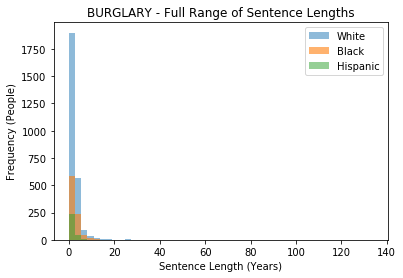

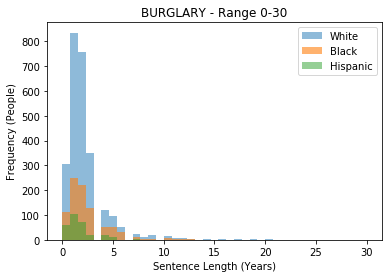

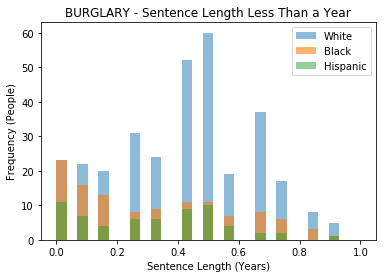

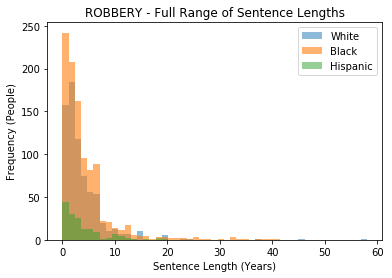

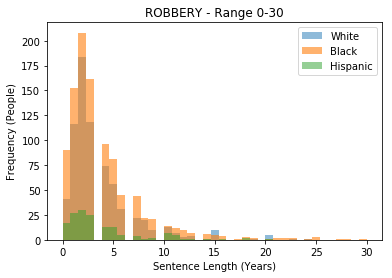

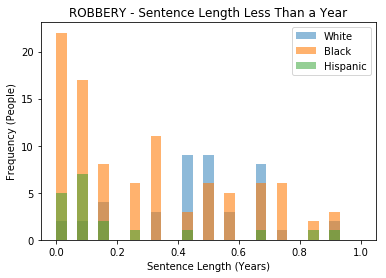

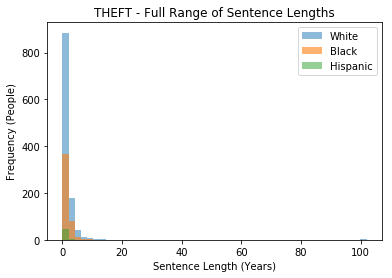

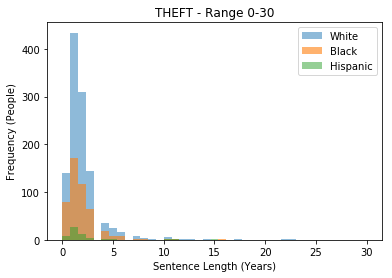

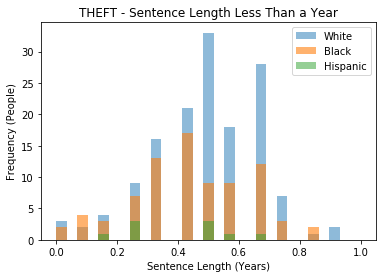

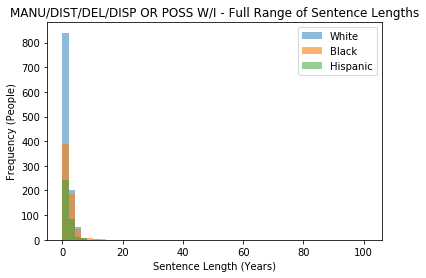

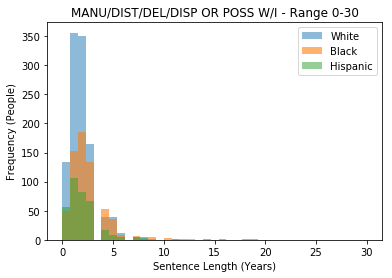

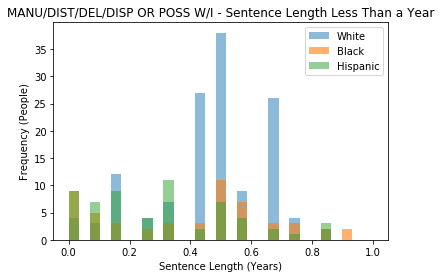

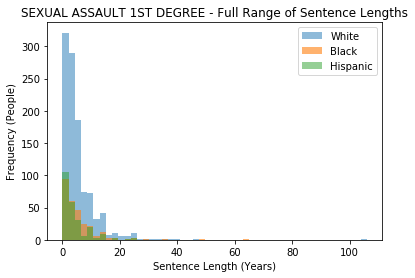

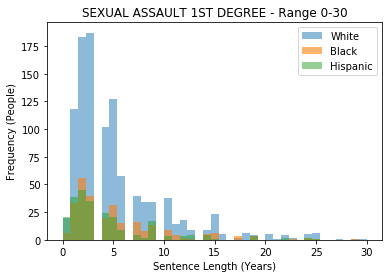

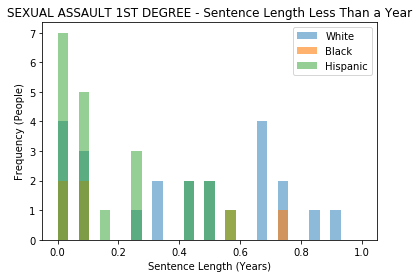

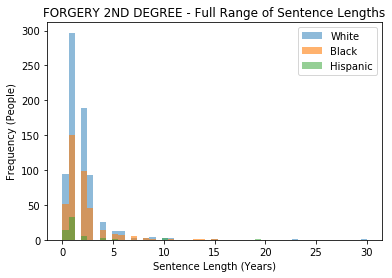

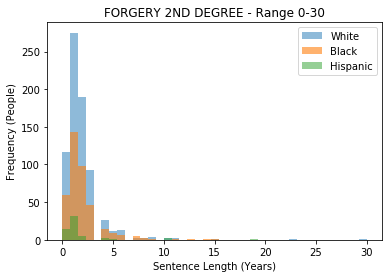

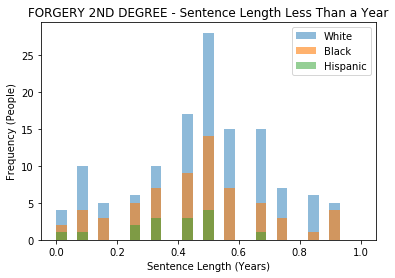

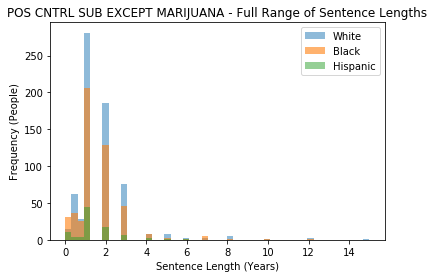

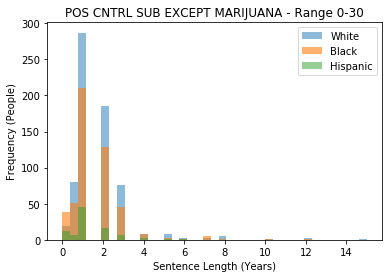

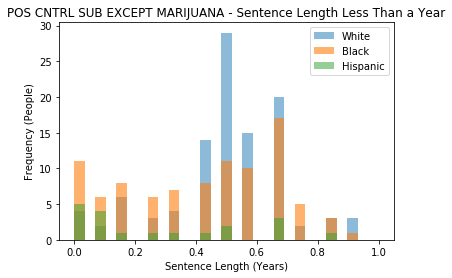

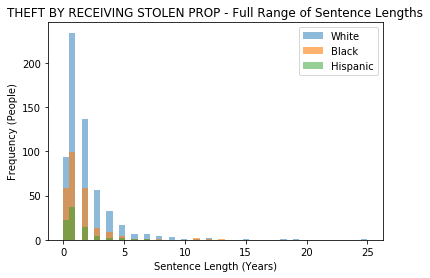

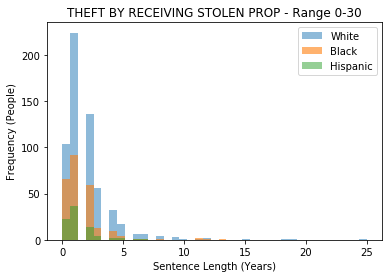

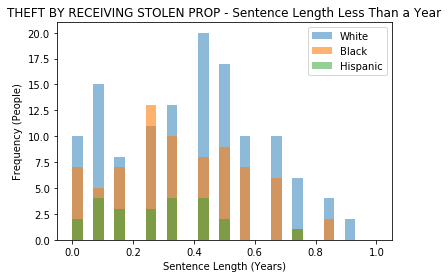

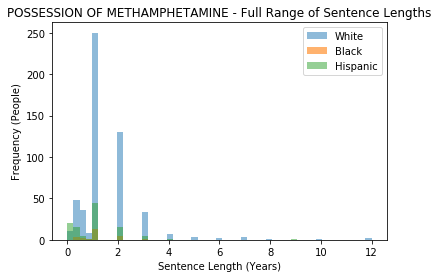

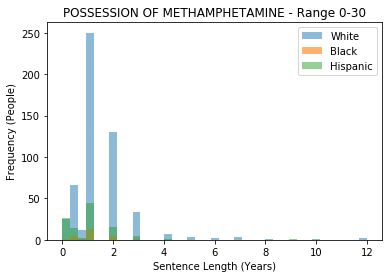

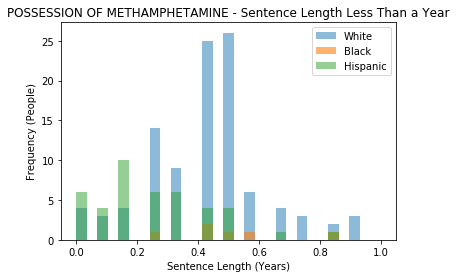

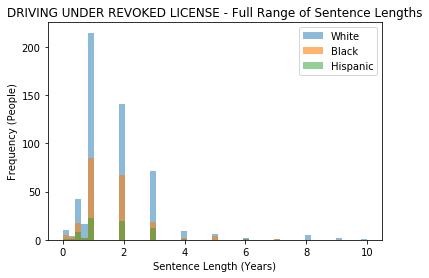

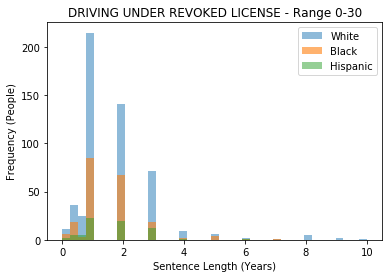

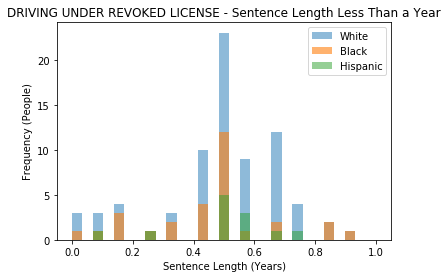

In [294]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
for crime in top_crimes:
    white_list = sentence_dict[crime + " - WHITE"]
    for i in range(len(white_list)):
        if white_list[i] == "LFE" or white_list[i] == "DTH":
            white_list[i] = 122
        white_list[i] = float(white_list[i])
        if white_list[i] < 0:
            white_list[i] = 0
    black_list = sentence_dict[crime + " - BLACK"]
    for i in range(len(black_list)):
        if black_list[i] == "LFE" or black_list[i] == "DTH":
            black_list[i] = 122
        black_list[i] = float(black_list[i])
        if black_list[i] < 0:
            black_list[i] = 0
    hisp_list = sentence_dict[crime + " - HISPANIC"]
    for i in range(len(hisp_list)):
        if hisp_list[i] == "LFE" or hisp_list[i] == "DTH":
            hisp_list[i] = 122
        hisp_list[i] = float(hisp_list[i])
        if hisp_list[i] < 0:
            hisp_list[i] = 0
    
    
    bins = np.linspace(0, max(white_list), 50)
    plt.hist(white_list, bins, alpha=0.5, label='White')
    plt.hist(black_list, bins, alpha=0.6, label='Black')
    plt.hist(hisp_list, bins, alpha=0.5, label='Hispanic')
    plt.legend(loc='upper right')
    plt.title(crime + " - Full Range of Sentence Lengths")
    plt.xlabel("Sentence Length (Years)")
    plt.ylabel("Frequency (People)")
    plt.show()
    
    
    #plt.subplot(1, 2, 1)
    bins = np.linspace(0, min(max(white_list), 30), 40)
    plt.hist(white_list, bins, alpha=0.5, label='White')
    plt.hist(black_list, bins, alpha=0.6, label='Black')
    plt.hist(hisp_list, bins, alpha=0.5, label='Hispanic')
    plt.legend(loc='upper right')
    plt.title(crime + " - Range 0-30")
    plt.xlabel("Sentence Length (Years)")
    plt.ylabel("Frequency (People)")
    plt.show()
    
    bins = np.linspace(0, min(max(white_list), 0.9999), 30)
    plt.hist(white_list, bins, alpha=0.5, label='White')
    plt.hist(black_list, bins, alpha=0.6, label='Black')
    plt.hist(hisp_list, bins, alpha=0.5, label='Hispanic')
    plt.legend(loc='upper right')
    plt.title(crime + " - Sentence Length Less Than a Year")
    plt.xlabel("Sentence Length (Years)")
    plt.ylabel("Frequency (People)")
    plt.show()
    

In [295]:
print(white_count)
print(black_count)
print(hisp_count)
print(other_count)

26874
11633
5224
2572


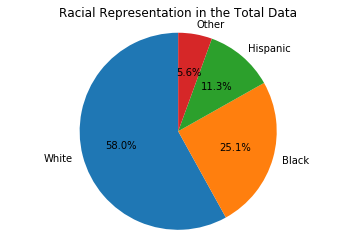

In [296]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'White', 'Black', 'Hispanic', 'Other'
sizes = [white_count, black_count, hisp_count, other_count]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Racial Representation in the Total Data")

plt.show()


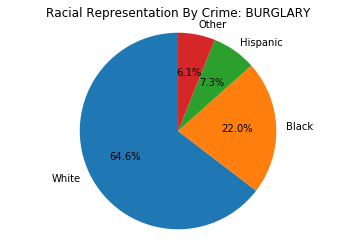

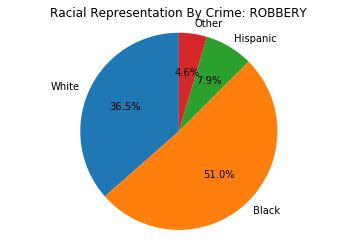

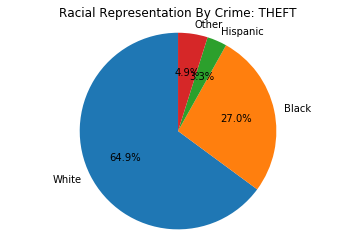

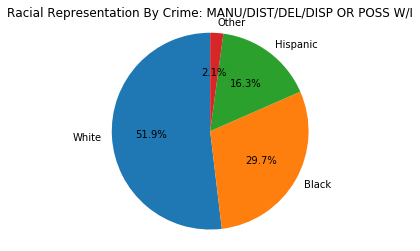

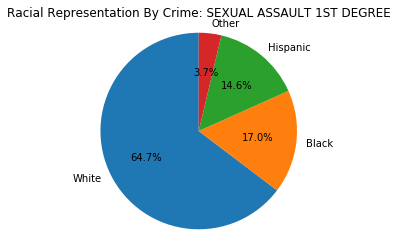

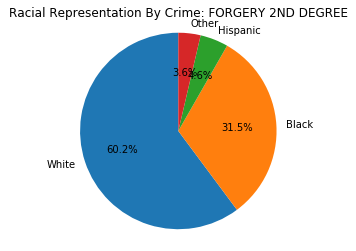

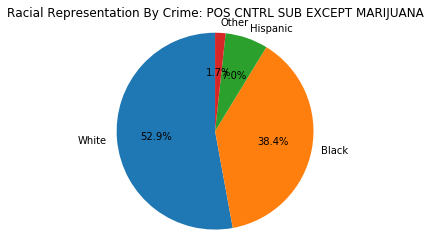

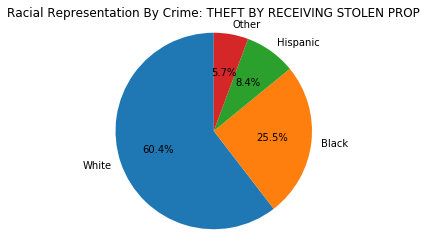

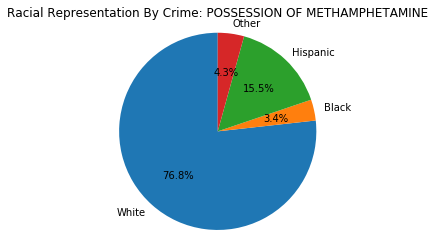

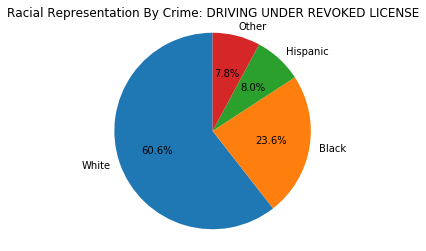

In [297]:
# pie chart per crime
for crime in top_crimes:
    white_size = len(sentence_dict[crime + " - WHITE"])
    black_size = len(sentence_dict[crime + " - BLACK"])
    hisp_size = len(sentence_dict[crime + " - HISPANIC"])
    other_size = len(sentence_dict[crime + " - OTHER"])
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'White', 'Black', 'Hispanic', 'Other'
    sizes = [white_size, black_size, hisp_size, other_size]
    explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Racial Representation By Crime: " + crime)

    plt.show()
    
    
    

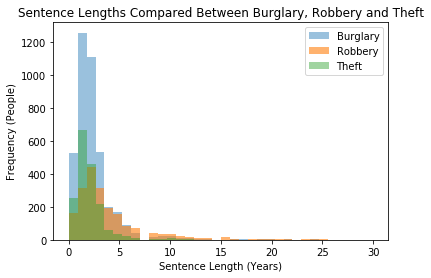

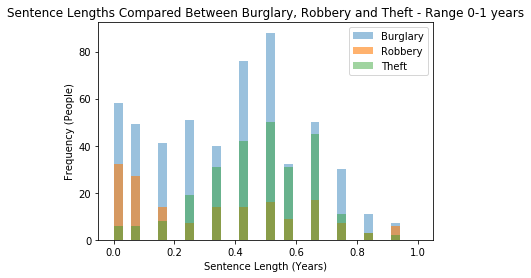

Robbery Stats:
Min: 0.0
Q1: 2.0
Median: 3.0
Mean: 4.04942645074224
Q3: 5.0
Max: 58.0


Burglary Stats:
Min: 0.0
Q1: 1.0
Median: 2.0
Mean: 2.4796533071059748
Q3: 3.0
Max: 134.0


Theft Stats:
Min: 0.0
Q1: 1.0
Median: 1.0
Mean: 2.0126262626262625
Q3: 2.0
Max: 102.0




In [298]:
import statistics

# interested why there is such a racial difference between burglary, robbery, theft
# so lets look at: histogram of sentence length differences for the three
# pie chart per crime
crimes = ["BURGLARY", "ROBBERY", "THEFT"]
burglary = sentence_dict["BURGLARY" + " - WHITE"] + sentence_dict["BURGLARY" + " - BLACK"] + sentence_dict["BURGLARY" + " - HISPANIC"] + sentence_dict["BURGLARY" + " - OTHER"]
robbery = sentence_dict["ROBBERY" + " - WHITE"] + sentence_dict["ROBBERY" + " - BLACK"] + sentence_dict["ROBBERY" + " - HISPANIC"] + sentence_dict["ROBBERY" + " - OTHER"]
theft = sentence_dict["THEFT" + " - WHITE"] + sentence_dict["THEFT" + " - BLACK"] + sentence_dict["THEFT" + " - HISPANIC"] + sentence_dict["THEFT" + " - OTHER"]
for i in range(len(burglary)):
    if burglary[i] == "LFE" or burglary[i] == "DTH":
        burglary[i] = 122
    burglary[i] = float(burglary[i])
    if burglary[i] < 0:
        burglary[i] = 0
for i in range(len(robbery)):
    if robbery[i] == "LFE" or robbery[i] == "DTH":
        robbery[i] = 122
    robbery[i] = float(robbery[i])
    if robbery[i] < 0:
        robbery[i] = 0
for i in range(len(theft)):
    if theft[i] == "LFE" or theft[i] == "DTH":
        theft[i] = 122
    theft[i] = float(theft[i])
    if theft[i] < 0:
        theft[i] = 0

bins = np.linspace(0, 30, 35)
plt.hist(burglary, bins, alpha=0.45, label='Burglary')
plt.hist(robbery, bins, alpha=0.6, label='Robbery')
plt.hist(theft, bins, alpha=0.45, label='Theft')
plt.legend(loc='upper right')
plt.title("Sentence Lengths Compared Between Burglary, Robbery and Theft")
plt.xlabel("Sentence Length (Years)")
plt.ylabel("Frequency (People)")
plt.show()

bins = np.linspace(0, 0.9999, 35)
plt.hist(burglary, bins, alpha=0.45, label='Burglary')
plt.hist(robbery, bins, alpha=0.6, label='Robbery')
plt.hist(theft, bins, alpha=0.45, label='Theft')
plt.legend(loc='upper right')
plt.title("Sentence Lengths Compared Between Burglary, Robbery and Theft - Range 0-1 years")
plt.xlabel("Sentence Length (Years)")
plt.ylabel("Frequency (People)")
plt.show()

# IQR
# robbery
q1_robbery, med_robbery, q3_robbery = np.percentile(robbery, [25, 50, 75])
rob_min, rob_max, rob_mean = min(robbery), max(robbery), statistics.mean(robbery)
print("Robbery Stats:")
print("Min: " + str(rob_min))
print("Q1: " + str(q1_robbery))
print("Median: " + str(med_robbery))
print("Mean: " + str(rob_mean))
print("Q3: " + str(q3_robbery))
print("Max: " + str(rob_max))
print("\n")

# burglary
q1_burglary, med_burglary, q3_burglary = np.percentile(burglary, [25, 50, 75])
burg_min, burg_max, burg_mean = min(burglary), max(burglary), statistics.mean(burglary)
print("Burglary Stats:")
print("Min: " + str(burg_min))
print("Q1: " + str(q1_burglary))
print("Median: " + str(med_burglary))
print("Mean: " + str(burg_mean))
print("Q3: " + str(q3_burglary))
print("Max: " + str(burg_max))
print("\n")

# theft
q1_theft, med_theft, q3_theft = np.percentile(theft, [25, 50, 75])
theft_min, theft_max, theft_mean = min(theft), max(theft), statistics.mean(theft)
print("Theft Stats:")
print("Min: " + str(theft_min))
print("Q1: " + str(q1_theft))
print("Median: " + str(med_theft))
print("Mean: " + str(theft_mean))
print("Q3: " + str(q3_theft))
print("Max: " + str(theft_max))

print("\n")


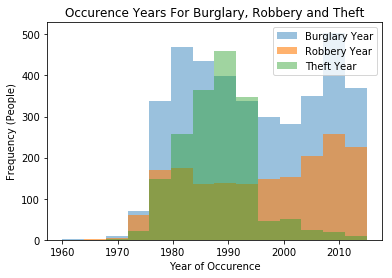

In [308]:
# histogram of when robbery, burglary, theft were committed?


robbery_begin = sorted(robbery_begin)
burglary_begin = sorted(burglary_begin)
theft_begin = sorted(theft_begin)

for i in range(len(robbery_begin)):
    robbery_begin[i] = int(robbery_begin[i])
for i in range(len(burglary_begin)):
    burglary_begin[i] = int(burglary_begin[i])
for i in range(len(theft_begin)):
    theft_begin[i] = int(theft_begin[i])
    
bins = np.linspace(1960, 2015, 15)
plt.hist(burglary_begin, bins, alpha=0.45, label='Burglary Year')
plt.hist(robbery_begin, bins, alpha=0.6, label='Robbery Year')
plt.hist(theft_begin, bins, alpha=0.45, label='Theft Year')
plt.legend(loc='upper right')
plt.title("Occurence Years For Burglary, Robbery and Theft")
plt.xlabel("Year of Occurence")
plt.ylabel("Frequency (People)")
plt.show()

In [302]:
print(robbery_begin)

[1964, 1964, 1969, 1970, 1973, 1973, 1973, 1970, 1970, 1970, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1973, 1973, 1973, 1973, 1973, 1973, 1972, 1973, 1973, 1979, 1975, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1974, 1975, 1975, 1975, 1975, 1973, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1977, 1977, 1977, 1977, 1977, 1977, 1973, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1976, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 197

In [304]:
print(theft_begin)

[1968, 1973, 1973, 1974, 1974, 1974, 1974, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1976, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1978, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 197